<a href="https://colab.research.google.com/github/ronwuyk/LSTM-learning/blob/master/ResalepricesHDBwithGradiov2futureprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This programme is written to to predict Resale Price of HDB from the Resale Price Dataset found in Data.gov.sg  https://beta.data.gov.sg/collections/189/view

please install these packages

In [ ]:
!pip install gradio

In [ ]:
!pip install tensorflow

In [ ]:
# prompt: installing keras

!pip install keras


commmand to load a previously saved model. Skip this if your generating a new model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/ColabNotebooks/SavedModels')


This section loads and reads the resale price dataset. Displaying the first 10 rows of data and also displays a plot of data showing general resale prices by town.

     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 05 months   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3      265000.

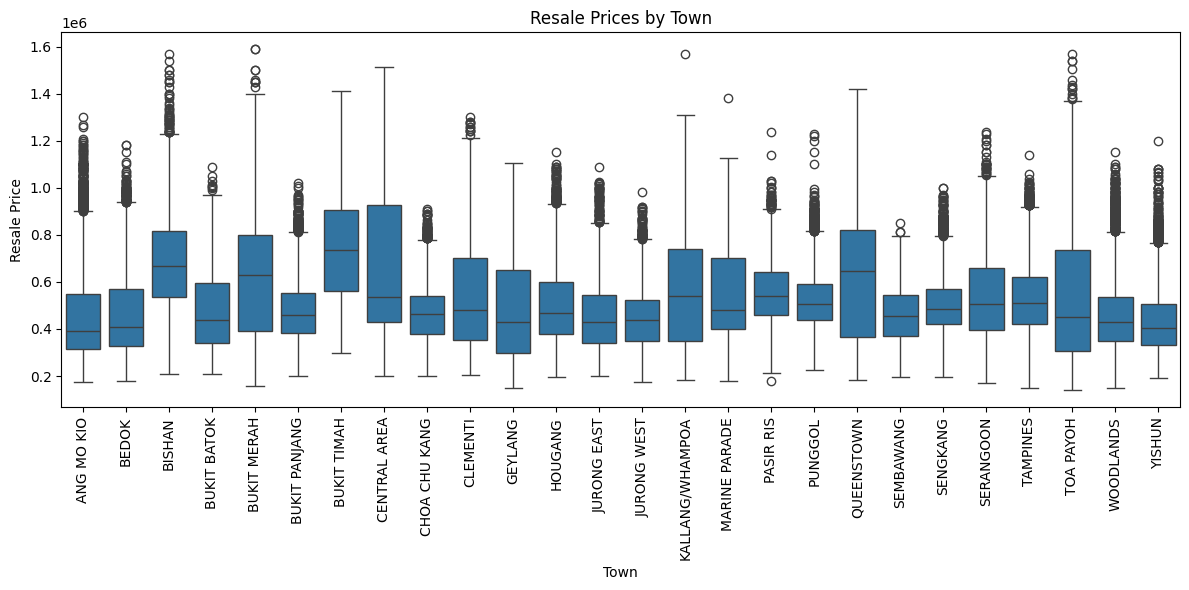

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/ColabNotebooks/ColabDatasets/ResaleflatpricesbasedonregistrationdatefromJan2017onwards-2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Plotting the data using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='town', y='resale_price', data=data)
plt.title('Resale Prices by Town')
plt.xlabel('Town')
plt.ylabel('Resale Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This simple code reads the dataset and allows the user to input a simple quiry of resale prices in a town and the price vs the size of the flat.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
file_path = '/content/drive/MyDrive/ColabNotebooks/ColabDatasets/ResaleflatpricesbasedonregistrationdatefromJan2017onwards-2.csv'
data = pd.read_csv(file_path)

# Define dropdown menus for town and flat type
town_dropdown = widgets.Dropdown(
    options=data['town'].unique(),
    description='Town:',
    disabled=False,
)

flat_type_dropdown = widgets.Dropdown(
    options=data['flat_type'].unique(),
    description='Flat Type:',
    disabled=False,
)

# Define the function to update the plot based on the dropdown selection
def update_plot(town, flat_type):
    filtered_data = data[(data['town'] == town) & (data['flat_type'] == flat_type)]

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='floor_area_sqm', y='resale_price', data=filtered_data)
    plt.title(f'Resale Prices in {town} for {flat_type} Flats')
    plt.xlabel('Floor Area (sqm)')
    plt.ylabel('Resale Price')
    plt.tight_layout()
    plt.show()

# Create interactive widgets
interactive_plot = widgets.interactive(update_plot, town=town_dropdown, flat_type=flat_type_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Town:', options=('ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', '…

This simple code reads the dataset and allows the user to input a simple quiry of resale prices in a town and the price in relation to the remaining lease. This is interesting, because generally as the flat gets older the prices tend to increase. This is a very interesting insight as it is found to affect the effectiveness of the predictive model, the difference of 1 year in the input of the flats "remaining_lease year", impact the predicted resales because the value actually shows a future or past resale price. Inputting the right remaining date is key for a useful quiry. Not the error of the model but likely result from User error.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
file_path = '/content/drive/MyDrive/ColabNotebooks/ColabDatasets/ResaleflatpricesbasedonregistrationdatefromJan2017onwards-2.csv'
data = pd.read_csv(file_path)

# Define dropdown menus for town and flat type
town_dropdown = widgets.Dropdown(
    options=data['town'].unique(),
    description='Town:',
    disabled=False,
)

flat_type_dropdown = widgets.Dropdown(
    options=data['flat_type'].unique(),
    description='Flat Type:',
    disabled=False,
)

# Define the function to update the plot based on the dropdown selection
def update_plot(town, flat_type):
    filtered_data = data[(data['town'] == town) & (data['flat_type'] == flat_type)]

    plt.figure(figsize=(20, 6))
    sns.scatterplot(x='remaining_lease', y='resale_price', data=filtered_data, alpha=0.6, s=120)
    plt.title(f'Remaining Lease and Resale Prices in {town} for {flat_type} Flats')
    plt.xlabel('Remaining Lease (years)')
    plt.ylabel('Resale Price')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create interactive widgets
interactive_plot = widgets.interactive(update_plot, town=town_dropdown, flat_type=flat_type_dropdown)
display(interactive_plot)



interactive(children=(Dropdown(description='Town:', options=('ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', '…

Below is the Gradio GUI allowing the User to input quiry by Town and output a estimated predictive Resale price of the flat. Disclamier the model is senstive to the remaining lease year, a less then current remaining lease year will output a future estimate price and a value more then current remaing lease year will ouput will estimate its Resale-price will show a Resale-price based on the remaining year.

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
from google.colab import drive
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import gradio as gr
!pip install gradio

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ColabDatasets/ResaleflatpricesbasedonregistrationdatefromJan2017onwards-2.csv')

# Preprocess data
data['lease_commence_date'] = pd.to_datetime(data['lease_commence_date'], format='%Y')
data['remaining_lease'] = data['lease_commence_date'].dt.year + 99 - pd.to_datetime(data['month'], format='%Y-%m').dt.year

# Select relevant columns
features = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'remaining_lease']
X = data[features]
y = data['resale_price']

# Encode categorical features
X = pd.get_dummies(X, columns=['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.3)# found the sweet spot to be epochs=200. batch=16 valiation=0.3

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {loss}')

# Calculate R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}')

# Function to predict resale price based on user input
def predict_price(town, flat_type, street_name, future_year):
  filtered_data = data[(data['town'] == town) & (data['flat_type'] == flat_type) & (data['street_name'] == street_name)]
  if filtered_data.empty:
    return "No data available for the selected criteria."

  avg_floor_area = filtered_data['floor_area_sqm'].mean()
  current_year = pd.to_datetime('today').year
  remaining_lease = filtered_data['remaining_lease'].mean() - (future_year - current_year)

  input_data = {
      'town': [town],
      'flat_type': [flat_type],
      'block': [filtered_data['block'].mode()[0]],
      'street_name': [street_name],
      'storey_range': [filtered_data['storey_range'].mode()[0]],
      'floor_area_sqm': [avg_floor_area],
      'flat_model': [filtered_data['flat_model'].mode()[0]],
      'remaining_lease': [remaining_lease]
  }

  input_df = pd.DataFrame(input_data)
  input_df = pd.get_dummies(input_df)
  input_df = input_df.reindex(columns=X.columns, fill_value=0)
  input_scaled = scaler.transform(input_df)

  predicted_price = model.predict(input_scaled)
  return f"Predicted Resale Price in {future_year}: ${predicted_price[0][0]:.2f}"

# Define Gradio interface
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Dropdown(data['town'].unique().tolist(), label="Town"),
        gr.Dropdown(data['flat_type'].unique().tolist(), label="Flat Type"),
        gr.Dropdown(data['street_name'].unique().tolist(), label="Street Name"),
        gr.Slider(2023, 2099, step=1, label="Future Year")
    ],
    outputs="text",
    title="Resale Flat Price Predictor",
    description="Predict the resale price of a flat based on user input."
)

# Launch the Gradio interface
iface.launch()


Epoch 1/200
6489/6489 [==============================] - 23s 3ms/step - loss: 282533.9688 - val_loss: 231803.2031
Epoch 2/200
6489/6489 [==============================] - 20s 3ms/step - loss: 213150.4219 - val_loss: 204638.9375
Epoch 3/200
6489/6489 [==============================] - 20s 3ms/step - loss: 192199.7031 - val_loss: 186965.9688
Epoch 4/200
6489/6489 [==============================] - 20s 3ms/step - loss: 173843.7344 - val_loss: 168239.4062
Epoch 5/200
6489/6489 [==============================] - 20s 3ms/step - loss: 155815.7344 - val_loss: 151508.4844
Epoch 6/200
6489/6489 [==============================] - 20s 3ms/step - loss: 139973.1250 - val_loss: 136762.2188
Epoch 7/200
6489/6489 [==============================] - 20s 3ms/step - loss: 125764.8047 - val_loss: 123814.8828
Epoch 8/200
6489/6489 [==============================] - 20s 3ms/step - loss: 113696.4297 - val_loss: 112995.1250
Epoch 9/200
6489/6489 [==============================] - 20s 3ms/step - loss: 103494.460

Experimenting to have a visual display of the model

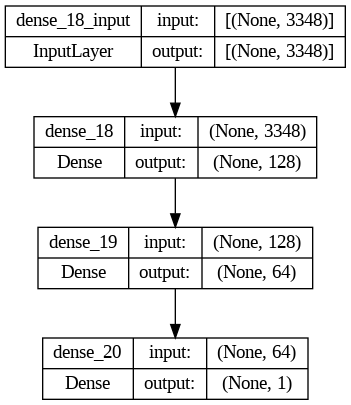

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)




allows for saving of a model for later use

In [ ]:
# prompt: Saving the model and print successful save

model.save('/content/drive/MyDrive/ColabNotebooks/SavedModels/resaleprice')
print("Model saved successfully!")


Model saved successfully!


lets test a completely different way of looking at this